In [1]:
from category_encoders import OrdinalEncoder
from eli5.sklearn import PermutationImportance
from joblib import load
from sklearn.model_selection import train_test_split
import eli5
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
model = load('model.joblib')
df = pd.read_csv('hostify.csv').drop(['longitude', 'latitude'], axis=1)

In [22]:
feat_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': model.feature_importances_.tolist()
}).sort_values(by='Importance', ascending=False)
feat_importance['Importance']

5    16578
1    12514
4     9551
3     8594
0     5392
7     2141
6     2077
2     1905
Name: Importance, dtype: int64

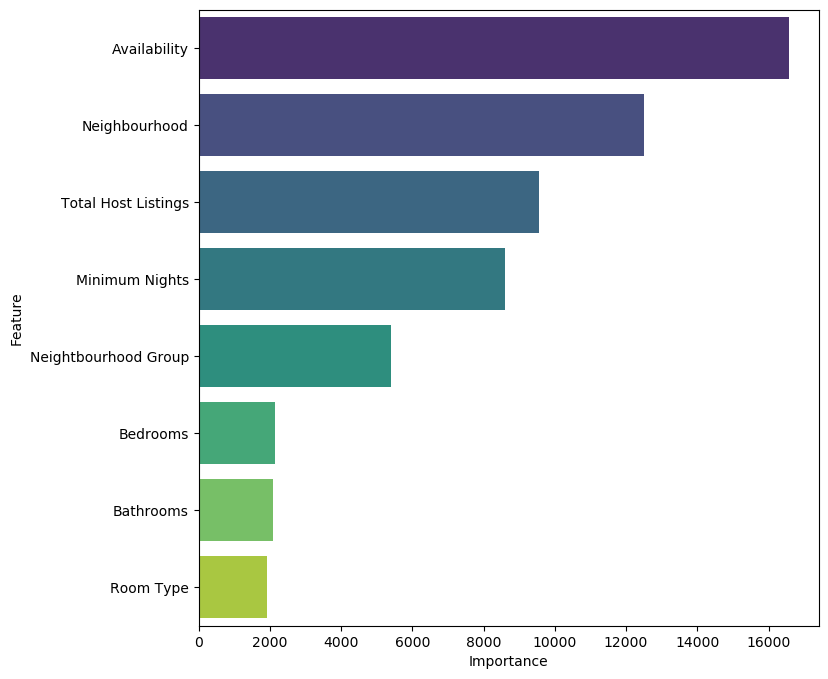

In [18]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(8,8))
    sns.barplot(data=feat_importance, y='Feature', x='Importance', palette='viridis')

In [3]:
df.head()

,id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,bathrooms,bedrooms
0,2015,Mitte,Brunnenstr. Süd,Entire home/apt,60,4,4,141,1.0,1.0
1,2695,Pankow,Prenzlauer Berg Nordwest,Private room,17,2,1,0,1.0,1.0
2,3176,Pankow,Prenzlauer Berg Südwest,Entire home/apt,90,62,1,220,1.0,1.0
3,3309,Tempelhof - Schöneberg,Schöneberg-Nord,Private room,26,5,1,297,1.0,1.0
4,7071,Pankow,Helmholtzplatz,Private room,42,2,1,26,1.0,1.0


In [11]:
encoder = OrdinalEncoder()
df_encoded = encoder.fit_transform(df)

In [12]:
train, test = train_test_split(df_encoded, random_state=42, test_size=.2)
train.shape, test.shape

((18001, 10), (4501, 10))

In [13]:
features = df_encoded.columns.drop(['id', 'price']).tolist()
target = 'price'
features

['neighbourhood_group',
 'neighbourhood',
 'room_type',
 'minimum_nights',
 'calculated_host_listings_count',
 'availability_365',
 'bathrooms',
 'bedrooms']

In [14]:
X_train = train[features]
X_test = test[features]
y_train = train[target]
y_test = test[target]

In [15]:
feature_names = ['Neightbourhood Group', 'Neighbourhood', 'Room Type', 'Minimum Nights',
                 'Total Host Listings', 'Availability', 'Bathrooms', 'Bedrooms']
permuter = PermutationImportance(
    model,
    scoring='neg_mean_absolute_error',
    n_iter=3,
    random_state=42
)
permuter.fit(X_test, y_test)
eli5.show_weights(
    permuter,
    top=None, #show permutation importances for top n features, none=all
    feature_names=feature_names
)

Weight,Feature
10.5629 ± 0.8944,Total Host Listings
10.2961 ± 1.0220,Room Type
5.6758 ± 0.9277,Availability
3.7507 ± 0.3328,Bedrooms
3.6603 ± 0.1439,Minimum Nights
1.8968 ± 0.0500,Neighbourhood
1.7009 ± 0.2942,Neightbourhood Group
1.6726 ± 0.1906,Bathrooms


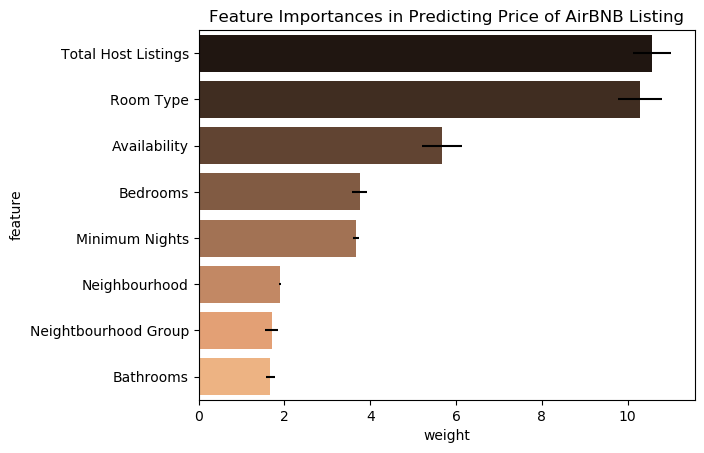

In [55]:
perm_importance = eli5.explain_weights_df(permuter, top=None, feature_names=feature_names)
with plt.style.context('default'):
    fig, ax = plt.subplots()
    sns.barplot(data=perm_importance, y='feature', x='weight', palette='copper', xerr=perm_importance['std'])
    ax.set_title('Feature Importances in Predicting Price of AirBNB Listing')